# Identifying vacant area of a city block

In [1]:
import os
example_data_path = "./data"

In [2]:
from blocksnet.models import City
# city_model = City.from_pickle(os.path.join(example_data_path, 'city_model.pickle'))

city_model = City.from_pickle(os.path.join(example_data_path, 'new_model.pickle'))


In [3]:
from blocksnet.method.vacant_area import VacantArea

block = city_model[0]
vacant_areas = VacantArea(city_model=city_model).calculate([block])

Error encountered: No data elements in server response. Check log and query location/tags.


In [4]:
vacant_areas.head()

,geometry,area,mrr_area,length,area_to_length,area_to_mrr_area,block_id
0,"POLYGON ((355642.109 6647882.317, 355642.134 6...",1069.794464,1323.165118,146.082746,7.323209,0.808512,0
1,"POLYGON ((355466.001 6647955.476, 355466.018 6...",2908.263155,5459.470573,333.495705,8.720542,0.532701,0
2,"POLYGON ((355513.523 6647982.517, 355513.447 6...",14332.027334,25091.951216,787.593894,18.197230,0.571180,0
3,"POLYGON ((355587.414 6648150.131, 355587.334 6...",2226.798819,2395.139997,192.723324,11.554382,0.929716,0
4,"POLYGON ((355685.109 6648110.040, 355685.031 6...",446.603339,461.069818,85.067576,5.249983,0.968624,0


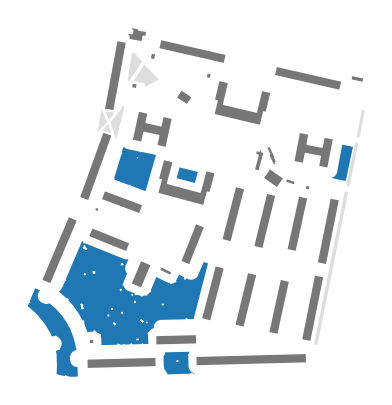

In [5]:
import contextily as cx
ax = vacant_areas.plot(figsize=(5,5))
block.get_buildings_gdf().plot(ax=ax, color='#777')
services_gdf = block.get_services_gdf()
services_gdf.loc[services_gdf.geom_type.isin(['Polygon', 'MultiPolygon'])].plot(ax=ax, color='#ddd')
ax.set_axis_off()